# Chapter 4 Logistic Regression

### 로지스틱회귀라는 이름이 회귀 연산을 시사하지만, 로지스틱회귀의 목표는 분류다. 

## Create a dummy dataset

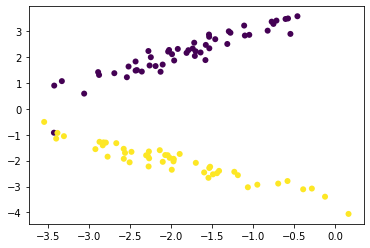

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, 
                           class_sep = 2.0, random_state=101)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

make_classification : 설정에 따른 분류용 가상 데이터를 생성한다.
* 인수 :
    - `n_samples` : 표본 데이터의 수, 디폴트 100
    - `n_features` : 독립 변수의 수, 디폴트 20
    - `n_informative` : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
    - `n_redundant` : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
    - `n_repeated` : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
    - `n_classes` : 종속 변수의 클래스 수, 디폴트 2
    - `n_clusters_per_class` : 클래스 당 클러스터의 수, 디폴트 2
    - `weights` : 각 클래스에 할당된 표본 수 
    - `random_state` : 난수 발생 시드
* 반환값 :
    - `x` : [n_samples, n_features] 크기의 배열
    >+ 독립 변수
    - `y` : [n_samples] 크기의 배열
    > + 종속 변수
    
        

In [4]:
y_orig = [0,0,0,0,0,0,1,1,1,1]
y_pred = [0,0,0,0,1,1,1,1,1,0]

make_classification 가지고 놀기

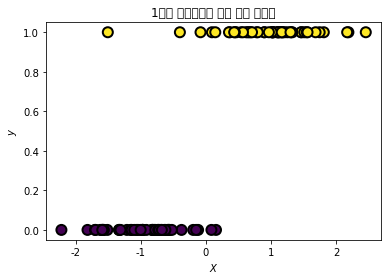

In [5]:
%matplotlib inline
from sklearn.datasets import make_classification

plt.title("1개의 독립변수를 가진 가상 데이터")
X, y = make_classification(n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, random_state=4)
plt.scatter(X, y, marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 현상
plt.rcParams['axes.unicode_minus'] = False # -부호 사용
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

한글 깨짐현상 제거 방법
`plt.rcParams['font.family'] = 'Malgun Gothic'`  

(-) 부호 사용
`plt.rcParams['axes.unicode_minus'] = False `

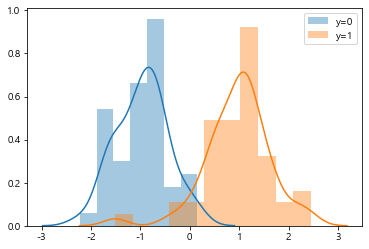

In [6]:
import seaborn as sns
sns.distplot(X[y == 0], label="y=0")
sns.distplot(X[y == 1], label="y=1")
plt.legend()
plt.show()

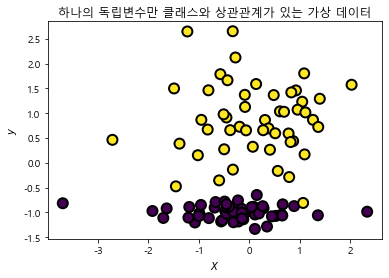

In [7]:
%matplotlib inline
from sklearn.datasets import make_classification

plt.title("하나의 독립변수만 클래스와 상관관계가 있는 가상 데이터")
X, y = make_classification(n_features=2, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 현상
plt.rcParams['axes.unicode_minus'] = False # -부호 사용
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

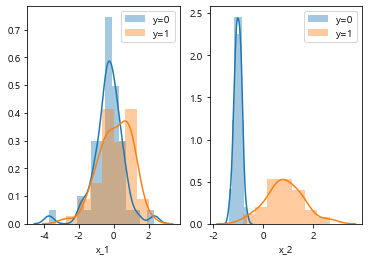

In [8]:
plt.subplot(121)
sns.distplot(X[y == 0, 0], label="y=0")
sns.distplot(X[y == 1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y == 0, 1], label="y=0")
sns.distplot(X[y == 1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.show()

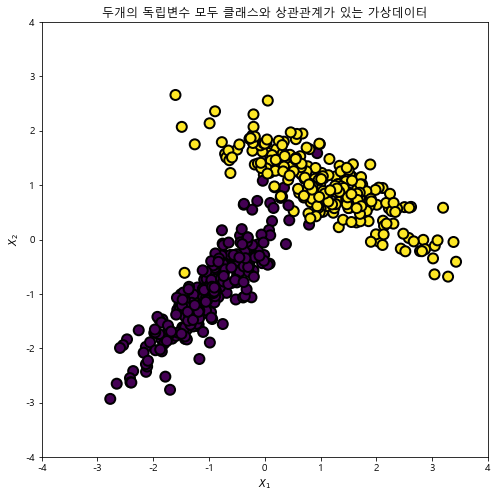

In [9]:
%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 현상
plt.rcParams['axes.unicode_minus'] = False # -부호 사용
plt.figure(figsize=(8, 8))
plt.title("두개의 독립변수 모두 클래스와 상관관계가 있는 가상데이터")
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

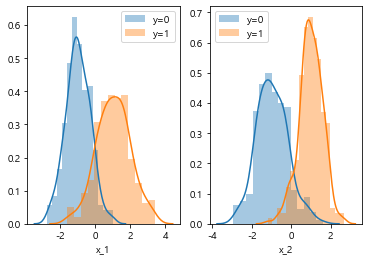

In [10]:
plt.subplot(121)
sns.distplot(X[y == 0, 0], label="y=0")
sns.distplot(X[y == 1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y == 0, 1], label="y=0")
sns.distplot(X[y == 1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.show()

각 클래스별 데이터의 갯수 - 0 클래스 : 90, 1 클래스 : 10


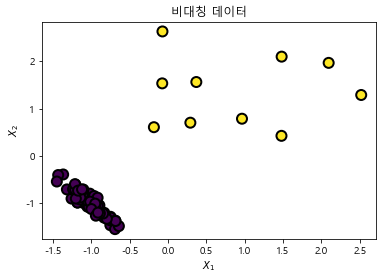

In [11]:
plt.title("비대칭 데이터")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1], random_state=6)
val, cnt = np.unique(y, return_counts=True)
print("각 클래스별 데이터의 갯수 - {} 클래스 : {}, {} 클래스 : {}".format(val[0], cnt[0], val[1], cnt[1]))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

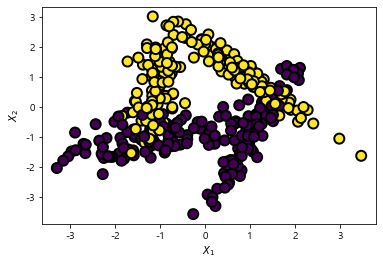

In [12]:
X2, Y2 = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0,
                             n_clusters_per_class=2, random_state=0)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

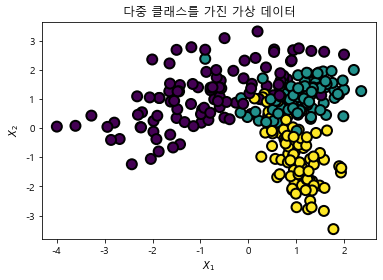

In [13]:
plt.title("다중 클래스를 가진 가상 데이터")
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

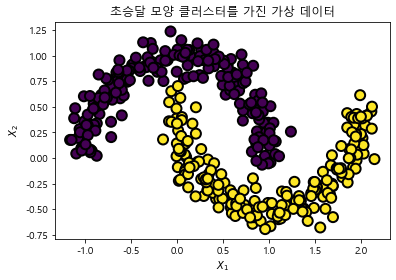

In [14]:
from sklearn.datasets import make_moons

plt.title("초승달 모양 클러스터를 가진 가상 데이터")
X, y = make_moons(n_samples=400, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

https://datascienceschool.net/view-notebook/ec26c797cec646e295d737c522733b15/

## Measuring the classifier's performance

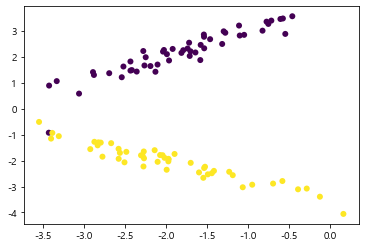

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, 
                           class_sep = 2.0, random_state=101)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

### 혼동 행렬
***
혼동 행렬 : 모델을 평가할 때 기준이 되는 모델중 하나
레이블을 0,1을 가진 데이터를 분류한다고 할 때 관심 범주를 1이라고한다.  
　  

![confusion_matrix](img4/confusion_matrix.PNG)  
　  
True Positives : 1인 레이블을 1이라 하는 경우를 True Positives라고 한다. - > 관심 범주를 정확하게 분류한 값.  
False Negatives : 1인 레이블을 0이라 하는 경우를 False Negatives라고 한다. -> 관심 범주가 아닌 것으로 잘못 분류함  
False Positives : 0인 레이블을 1이라 하는 경우를 False Positives라고 한다. -> 관심 범주라고 잘못 분류함  
True Negatives : 0인 레이블을 0이라 하는 경우를 True Negatives라고 한다. -> 관심 범주가 아닌것을 정확하게 분류.
　  
이 4가지 정보를 바탕으로 3가지 척도를 평가할 수 있다.   
첫번째 척도로, **정확도(Accuracy)**가 있다. 정확도는 1을 1로, 0을 0으로 정확하게 분류해낸 것을 의미한다. 모델이 얼마나 정확한지를 평가하는 척도라고 할 수 있다.  
　  
　  
　  
두번째 척도로, **정밀도(Precision)**가 있다. 모델을 통해 1이라고 분류해낸 그룹 A가 있을 때, 모델이 얼마나 믿을만한 정도로 A를 만들어 냈는지를 평가하는 것이다. 어부가 그물을 던져 물고기를 잡을 때, 그물 안에 1이라는 물고기가 얼마나 들어있는가에 대한 척도이다.  
　  
　  
　  
세번째 척도로, **재현도(Recall)**가 있다. 정밀도와 비교되는 척도로써, 전체 예측 중에 TP가 얼마나 많은 가에 관한 것이다. 관심 영역만을 얼마나 추출해냈는지를 말한다. 즉, 모형의 실용성과 관련된 척도라고 할 수 있다.  
　  
　  
![정확도](img4/values.PNG)  
　  
이렇게 총 4가지의 평가 척도를 각각 상황에 맞게 사용해야 한다. 


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_orig, y_pred)
# y_orig = [0,0,0,0,0,0,1,1,1,1] 
# y_pred = [0,0,0,0,1,1,1,1,1,0]
# True positives : (0,0) 4번
# False Negatives : (0,1) 2번
# False Positives : (1, 0) 1번
# Ture Negatives : (1, 1) 3번

array([[4, 2],
       [1, 3]], dtype=int64)

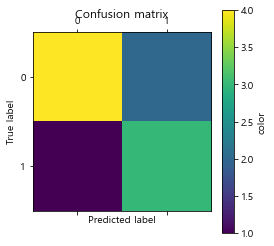

In [32]:
plt.matshow(confusion_matrix(y_orig, y_pred))
plt.title('Confusion matrix')
plt.colorbar(label='color')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('정확도 :', accuracy_score(y_orig, y_pred))
print('정확도 :', precision_score(y_orig, y_pred))
print('정확도 :', recall_score(y_orig, y_pred))
print('정확도 :', f1_score(y_orig, y_pred))


정확도 : 0.7
정확도 : 0.6
정확도 : 0.75
정확도 : 0.6666666666666665


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_orig, y_pred))

precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



## Fitting the classifier

이진 분류 문제에서, 아웃풋은 0 또는 1이 될 수 있다. 클래스 "1"에 속하는 라벨의 확률을 확인하면 어떨까? 더 구체적으로 말하면, 분류 문제는 다음과 같이 볼 수 있다. 특성 벡터가 주어지면 조건부 확률을 최대화하는 클래스를 찾는다.  
![조건부](img4/conditional.PNG)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, \
    y_test = train_test_split(X, y.astype(float),\
    test_size=0.33, random_state=101)

In [36]:
y_test.dtype

dtype('float64')

In [37]:
y_test

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.])

In [38]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)

array([-0.19021825,  1.14481132,  1.16345687,  0.00906543,  0.17492642,
        0.75010591,  0.01764075,  0.69408067,  0.99490823,  0.98471815,
        0.01184894,  0.91408215,  0.77985749,  0.66302112,  0.04339816,
        0.19057929,  1.19126856,  0.01473595,  0.80911677, -0.03827048,
       -0.08450995, -0.22769924,  0.57176711,  0.75836004,  1.02104676,
        1.06148483,  0.873505  ,  1.04779876, -0.1655144 ,  0.66570701,
       -0.01700988,  1.03270133,  0.00856569])

분류를 하였지만 값들이 
0과 1사이에 있지 않기 때문에 0과 1사이의 값들로 clipping해서 임계값(0.5)보다 크면 1 보다 작으면 0으로 해서 추정해야한다.  
![로지스틱 회귀](img4/로지스틱회귀알고리즘.PNG)  
　  
여기에서 W[[0]](편향 가중치)는 시그모이드의 중심정에 대한 정렬 오차를 처리한다. 이것이 로지스틱회귀 알고리즘이다.  
　  
![시그모이드](img4/시그모이드.PNG)  
　  
why 로지스틱?, what 델타 함수?  
시그마의 표준 선택은 로지스틱 함수이며, 또한 역로짓 함수라고도 한다.

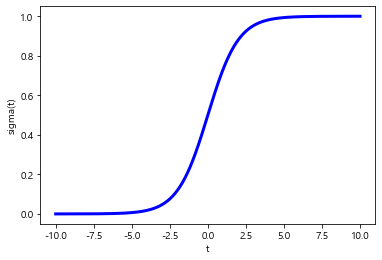

In [39]:
import numpy as np
def model(x):
    return 1 / (1 + np.exp(-x))

X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color ='blue', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')

plt.show()

![log_loss](img4/로그손실.PNG)  
통계에서 확률에 적용하는 로짓함수는 로그 손실을 반환한다.    
즉 함수 [0,1]을 (-무한대,+무한대)의 숫자로 변환한다. 이제 로지스틱회귀를 위한 시그모이드 함수로 역로짓 함수를 선택한 논리를 직관적으로 이해할 수 있는지 살펴보자.  
　  
먼저 로지스틱회귀방정식에 따라 두 개의 클래스에 대한 확률을 정리하자.
　  

![two_class](img4/두개의클래스.PNG)  
　  
로그손실을 계산해보자.   
　  
![로그손실](img4/로그손실2.PNG)  
　  
그것을 "1"을 얻을 확률에 적용되는 로짓 함수다.  
　  
![로짓함수](img4/로짓함수.PNG)  
　  
 


In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



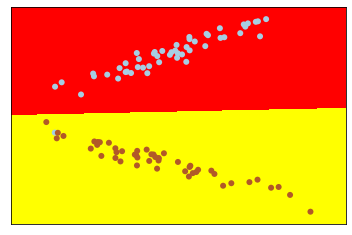

In [41]:
h = .02 # 메시 스탭의 크기


# 결정 경계를 플롯한다. 이를 위해 각각에 색상을 지정한다.accuracy_score
# 메시에서 [x_min, m_max]x[y_min, y_max]를 가리킨다.
x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


# 결과를 색상을 넣어 플롯한다.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)


# 훈련 포인트도 플롯한다.
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', linewidth=0,
           cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

```
ax = plt.axes()
ax.arrow
    |
    v
plt.arrow
```

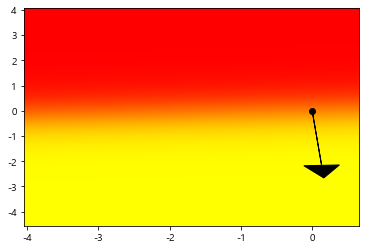

In [42]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

ax = plt.axes()
ax.arrow(0, 0, clf.coef_[0][0], clf.coef_[0][1], head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.scatter(0, 0, marker='o', c='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

순수한 노란색과 순수한 빨간색은 예측 확률이 각각 1과 0에 매우 가까운 경우다.  
화살표는 클래시파이어 가중치 벡터의 표현이다.

In [44]:
%timeit clf.fit(X,y)
%timeit clf.predict(X)
%timeit clf.predict_proba(X)

3.06 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
58.2 µs ± 3.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
69.1 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


로지스틱회귀의 장점과 단점  
* 장점
>- 선형적이다. 분류를 위한 선형회귀와 동등하다.
>- 이해하기 쉽고, 아웃풋은 가장 가능성이 높은 클래스 또는 멤버십 확률이 될 수 있다.
>- 훈련시키기 간단하다. 매우 적은 계수를 갖는다. 이는 모델을 매우 작게 저장할 수 있다.
>- 계산상 효율적이다. 4장 후반부에서 살펴보겠지만 몇 가지 특별한 기술을 사용 하면 매우 빠르게 훈련할 수 있다.
>- 다중 클래스 분류를 위한 확장 기능을 가진다.
* 단점
>- 대부분의 고급 알고리즘에 비해 성능이 좋지 않은 경우가 많다.
>- 선형적이다. 문제가 비선형인 경우 클래시파이어를 데이터셋에 적절하게 적합시킬 수 있는 방법이 없다.

### Gradient

 모델의 적합은 폐쇄형 또는 반복형이다. 반면 반복 알고리즘은 각 업데이트에 대해 계산이 거의 필요 없이 단계별로 최소에 도달하며, 언제든지 중단할 수 있다.  
 　  
 
 기울기 하강은 로지스틱회귀모델을 적합시키기 위해 선택하는 일반적인 방법이다. 그러나 그것은 뉴튼의 방법과 인기를 공유한다. 로지스틱회귀는 반복 최적화의 기본이며, 이미 도입한 것이므로 이 절에서 중심적으로 다룰 것이다.

손실 함수(loss function)의 미분을 계산하면서, 로지스틱 함수를 도출하자  
　  
![losf](img4/lossfun_derv.PNG)  
　  
1차 미분하면  
　  
![losf](img4/1step.PNG)  
　  
가중치 집합에 대한 우도 계산  
　  
![likelihood](img4/likelihoodin1step.PNG)  
　  
마지막행에서 yi가 0 또는 1일 수 있다는 사실을 기반으로 트릭을 사용했다. 이에 따라 yi=1인 경우 곱셈의 첫 번째 요소만 계산되고 아니면 두 번째 요소만 계산된다.  
　  
![likelihood1step2](img4/likelihoodin1step2.PNG)  
　  
첫째, SGD는 한 번에 한 점씩만 작동한다. [SGD설명](https://mangkyu.tistory.com/62)  
둘째, 우도를 최대화해야 한다. 
기울기 항강법https://www.notion.so/Gradient-Descent-algorithm-0fabb79aeb78449b9411f90674860e65  
　  
　  


## Multiclass Logistic Regression

3개의 더미클래스 테이터셋을 만들고 그것을 훈련 집합

## One-VS-all  

* 적합시키기 위한 클래시파이어의 수는 정확하게 클래스의 수와 같다. 따라서 모델은 N개의 가중치 벡터로 구성된다.
* 더욱이 이 작업은 병렬이며 다중 스레드를 사용해 N개 클래시파이어의 훈련을 동시에 수행할 수 있다.
* 클래스가 균형적인 경우 각각 클래시파이어에 대해 훈련 시간은 비슷하며 예측 시간은 동일하다.

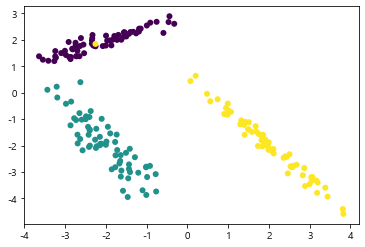

In [47]:
%reset -f
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, 
                           n_classes=3, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, 
                           class_sep = 2.0, random_state=101)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y.astype(float),
                                                   test_size=0.33,
                                                   random_state=101)
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        22
         2.0       1.00      1.00      1.00        20

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



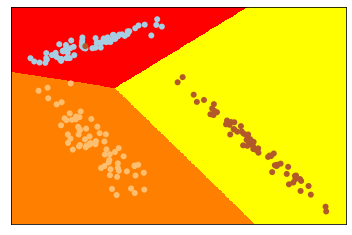

In [49]:
import numpy as np

import numpy as np

h = .02

x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', linewidth=0,
           cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [50]:
print(X_test[0])
print(y_test[0])
print(y_clf[0])

[-3.26744968  1.19639333]
0.0
0


In [52]:
clf.predict_proba([X_test[0]])

array([[0.85126747, 0.13897348, 0.00975905]])

## An Example

In [59]:

X, y = make_classification(n_samples=10000, n_features=10,
                          n_informative=10, n_redundant=0,
                          random_state=101)

In [60]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y,Xc)
fitted_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


In [55]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 07 Aug 2020   Pseudo R-squ.:                  0.3671
Time:                        18:03:47   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4299      0.039     11.023      0.000       0.353       0.506
x1             0.0671      0.015      4.410      0.000       0.037       0.097
x2            -0.7828      0.019    -41.947      0.000      -0.819      -0.746
x3             0.1221      0.016      7.815      0.000       0.091       0.153
x4             0.2841      0.016     18.150      0.000       0.253       0.315
x5             0.1469      0.014     10.283      0.000       0.119       0.175
x6            -0.3414      0.019    -17.636      0.000      -0.379      -0.303
x7             0.0503      0.014      3.481      0.000       0.022       0.079
x8            -0.1393      0.014     -9.642      0.000      -0.168      -0.111
x9             0.1127      0.014      7.931      0.000       0.085       0.141
x10           -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

* convered : 훈련받는 동안 분류 모델이 수렴 단계에 도달했는지 여부를 알려 준다. 결곽가 참인 경우에만 모델을 사용한다.
* Log-Likelihood : 로그 우도로, 이전에 정의한 것이다.
* LL-Null : 절편만 예측변수로 사용한는 경우의 로그 우도다.
* LLR p-value : 통계적으로 로그 우도 비율이 LLR보다 클 카이 제곱 확률이다. 기본적으로 이것은 모델이 상수 값으로 추정하는 것보다 얼마나 더 좋은지를 보여준다. LLR은 로그 우도 비율 즉, null모델 로그 우도를 대체 모델의 우도로 나눈 값이다.
* Pseudo R-squarred : 모델에서 설명되지 않은 전체 변동의 비율로 볼 수 있따. 그것은 1-Log-likelihood/LL-Null로 계산된다.

In [61]:
import pandas as pd

# As an alternative, this example is using the statsmodels.formula.api module
# Equivalent to the R syntax for linear models, it requires to specify the form
# of the logistic regression using 'response ~ predictor1 (+ predictor2 + ...)'

Xd = pd.DataFrame(X)
Xd.columns = ['VAR'+str(i+1) for i in range(10)]
Xd['response'] = y

logistic_regression = smf.logit(
    formula = 'response ~ VAR1+ VAR2 + VAR3 + VAR4 + \
               VAR5 + VAR6 + VAR7 + VAR8 + VAR9 + VAR10',
               data=Xd)

fitted_model = logistic_regression.fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               response   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 07 Aug 2020   Pseudo R-squ.:                  0.3671
Time:                        18:10:03   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4299      0.039     11.023      0.000       0.353       0.506
VAR1           0.0671      0.015      4.410      0.000       0.037       0.097
VAR2          -0.7828      0.019    -41.947      0.000      -0.819      -0.746
VAR3           0.1221      0.016      7.815      0.000       0.091       0.153
VAR4           0.2841      0.016     18.150      0.000       0.253       0.315
VAR5           0.1469      0.014     10.283      0.000       0.119       0.175
VAR6          -0.3414      0.019    -17.636      0.000      -0.379      -0.303
VAR7           0.0503      0.014      3.481      0.000       0.022       0.079
VAR8          -0.1393      0.014     -9.642      0.000      -0.168      -0.111
VAR9           0.1127      0.014      7.931      0.000       0.085       0.141
VAR10         -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""